# Handwritten Digits Classification

## Introduction

The MNIST dataset is a large database of handwritten digits commonly used for training various image processing systems. The dataset contains 60,000 training images and 10,000 testing images, with each image being a 28x28 pixel grayscale image representing a digit from 0 to 9.The dataset is taken from the following link: [The MNIST database of handwritten digits from OpenML](https://www.openml.org/search?type=data&status=active&id=554&sort=runs).

- In this notebook, we will perform comprehensive Exploratory Data Analysis (EDA) on the MNIST dataset to understand its structure and characteristics. This includes basic statistics, visualization of digit distributions, pixel value analysis, sample images, 

- We will then apply six machine learning models to the MNIST dataset, measure their performance, and compare the results. The models include Logistic Regression, Gaussian Naive Bayes, Random Forest, K-Nearest Neighbors (KNN), Decision Tree, and AdaBoost. We will measure the training and evaluation time for each model, generate confusion matrices, and compare model performance.


## Loading and Exploring the MNIST Dataset

In this notebook, we will load the MNIST dataset downloaded from OpenML, convert it to a Pandas DataFrame, clean the label column, and visualize some of the images. The MNIST dataset consists of images of handwritten digits and their corresponding labels.

## Step 1: Import Necessary Libraries
First, we need to import the necessary libraries.


In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import arff


D:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 2: Load the MNIST Dataset 
We will load the dataset using `scipy.io.arff` to read the ARFF file format and convert it to a Pandas DataFrame Since the downloaded file from OpenML is in `arff` format.


In [2]:
# Load the MNIST dataset from the provided ARFF file
file_path = r"C:\Users\Owner\Desktop\Final Project\Ramprasad\mnist_784.arff"
data, meta = arff.loadarff(file_path)

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)


In [3]:
# Display the first few rows of the DataFrame to verify
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'5'
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'4'
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'9'


The MNIST dataset downloaded from OpenML does not contain image files directly. Instead, it contains the pixel values of the images in tabular format. Each row in the dataset represents a single image, and each column represents a pixel value, with one additional column for the label (digit).

Here is a summary of the format:

- Each image is represented as a 1D array of 784 pixel values (28x28).

- The pixel values range from 0 to 255, where 0 is white and 255 is black.

- An additional column represents the label (digit).

Given this, you need to reshape these pixel values into a 2D array to visualize the images.

## Step 3: Convert Image Data to Numeric Format
The image data may initially be loaded as object type. We need to convert it to a numeric format (float) for further processing.



In [4]:
# Convert the image data to numeric format
for column in df.columns[:-1]:  # Exclude the 'class' column
    df[column] = pd.to_numeric(df[column])


## Step 3.1 Check the `CLASS` Column

In [5]:
df['class']

0        b'5'
1        b'0'
2        b'4'
3        b'1'
4        b'9'
         ... 
69995    b'2'
69996    b'3'
69997    b'4'
69998    b'5'
69999    b'6'
Name: class, Length: 70000, dtype: object

## Step 4: Clean the Class Column
The labels are stored as byte strings. We need to decode them to regular strings and convert them to integers. And also rename the `class` column to `label`


In [6]:
# Clean the Class column
df['class'] = df['class'].apply(lambda x: int(x.decode('utf-8')))

# Rename the 'class' column to 'label'
df.rename(columns={'class': 'label'}, inplace=True)


In [7]:
# Display the first few rows of the DataFrame to verify
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


## Step 5: Save the Final Dataset to a CSV File
We will save the final dataset to a CSV file for future use.


In [8]:
# Save the cleaned dataset to a CSV file
file_path= "C:/Users/Owner/Desktop/Final Project/Ramprasad/image.csv"
df.to_csv(file_path, index=False)

In [9]:
file_path= "C:/Users/Owner/Desktop/Final Project/Ramprasad/image.csv"
df=pd.read_csv(file_path) # Save the cleaned dataset to a CSV file



In [10]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


# Step 6: Exploratory Data Analysis (EDA) on the MNIST Dataset

In this section, we will perform Exploratory Data Analysis (EDA) on the MNIST dataset to understand its structure and characteristics. EDA involves summarizing the main characteristics of the dataset, often visualizing them, to gain insights.

## Step 6.1: Display Basic Information About the Dataset
We will display basic information about the dataset, such as the number of samples, number of features, and data types.


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to label
dtypes: float64(784), int64(1)
memory usage: 419.2 MB


## Step 6.2: Display Basic Statistics of the Dataset
We will display basic statistics of the dataset, such as mean, standard deviation, min, max, and quartiles.


In [12]:
# Display basic statistics of the dataset
df.describe()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [13]:
# Check Vlaue Count of Labels
df.label.value_counts()

label
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

## Step 6.3: Visualize the Distribution of Labels
We will visualize the distribution of labels (digits) in the dataset to understand the class distribution.


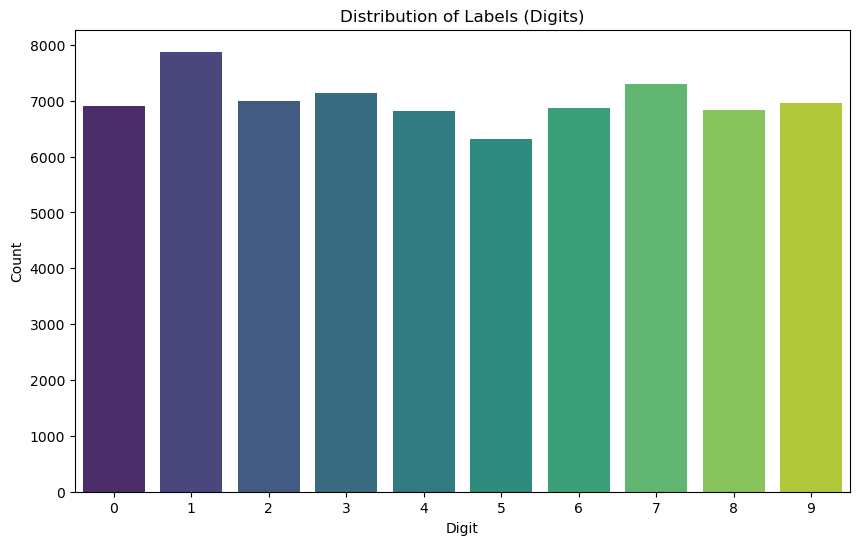

In [14]:
import seaborn as sns
# Visualize the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Labels (Digits)')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()


## Step 6.4: Visualize the Images
We will define a function to visualize the images from the dataset. The function will reshape the pixel values into a 2D array and plot the image using matplotlib.


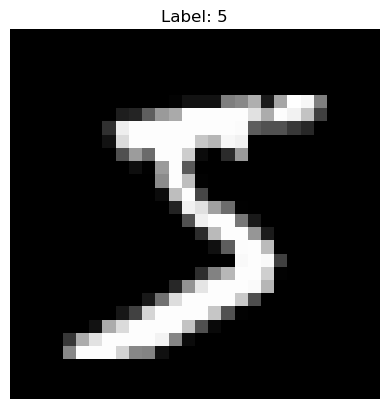

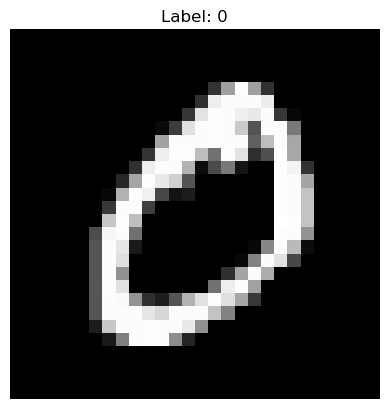

In [15]:
# Function to visualize an image from the dataset
def visualize_image(index):
    # Get the image data from the DataFrame
    image_data = df.iloc[index, :-1].values  # Exclude the label column
    label = df.iloc[index, -1]  # Get the label

    # Reshape the image data into a 2D array (28x28)
    image_data = image_data.reshape(28, 28)

    # Plot the image
    plt.imshow(image_data, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

# Visualize the first image in the dataset
visualize_image(0)

# Visualize the second image in the dataset
visualize_image(1)


## Step 6.5: Visualize Sample Images for Each Digit
We will visualize sample images for each digit to understand the variations in handwriting.


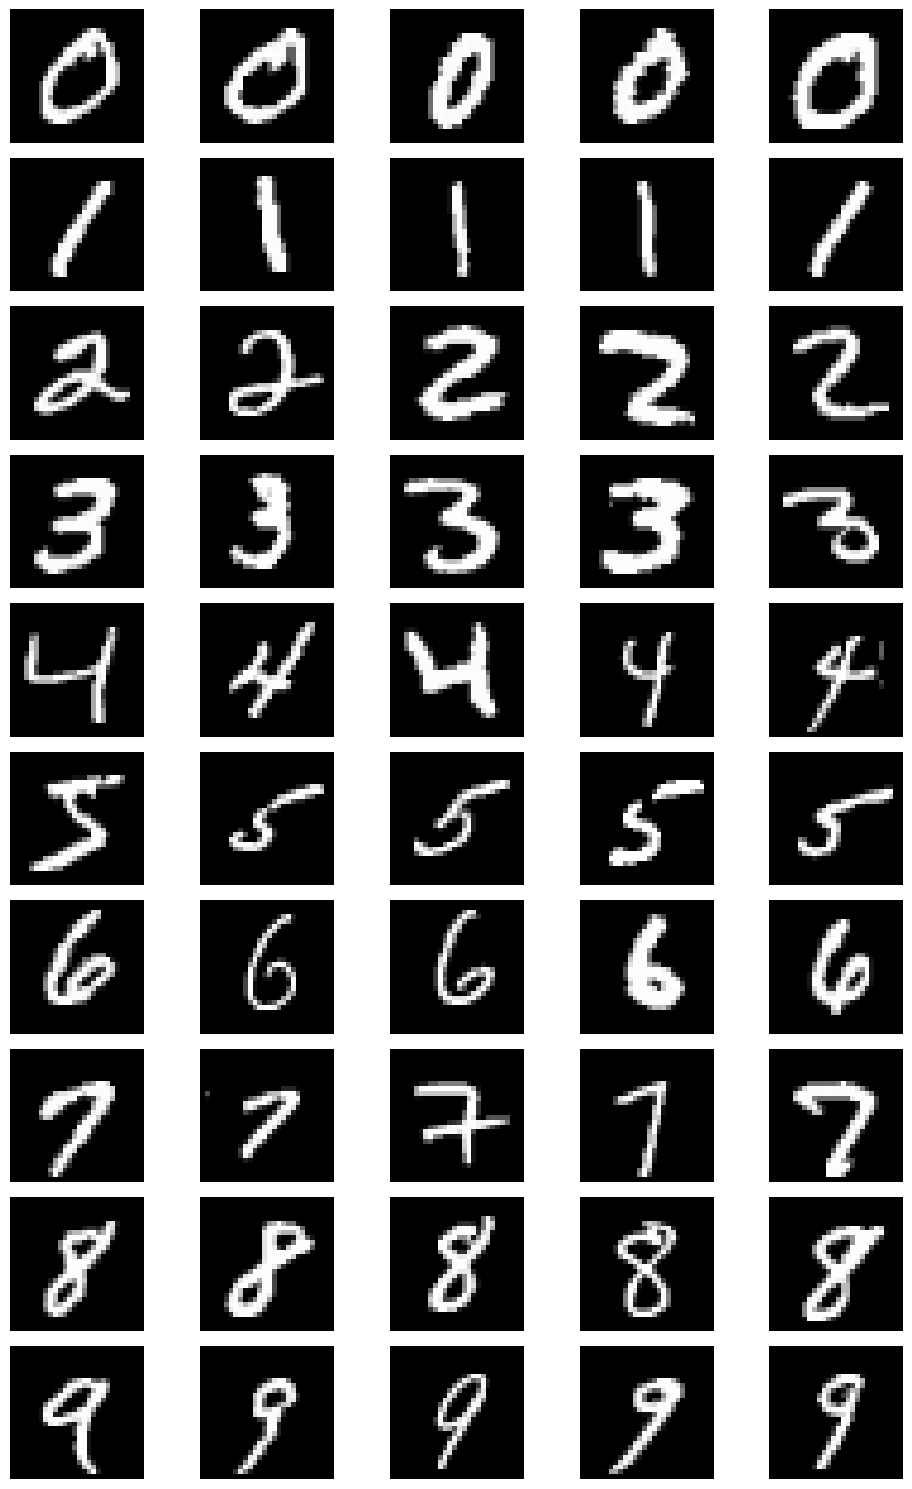

In [16]:
# Function to visualize multiple images
def visualize_sample_images(df, samples_per_digit=5):
    fig, axes = plt.subplots(nrows=10, ncols=samples_per_digit, figsize=(10, 15))
    for digit in range(10):
        digit_df = df[df['label'] == digit]
        for i in range(samples_per_digit):
            image_data = digit_df.iloc[i, :-1].values.reshape(28, 28)
            ax = axes[digit, i]
            ax.imshow(image_data, cmap='gray')
            ax.axis('off')
            if i == 0:
                ax.set_ylabel(f'Digit {digit}', size='large')
    plt.tight_layout()
    plt.show()

# Visualize sample images for each digit
visualize_sample_images(df)


## Step 6.6: Visualize the Average Image of Each Digit
We will compute and visualize the average image of each digit to see the typical representation of each digit.


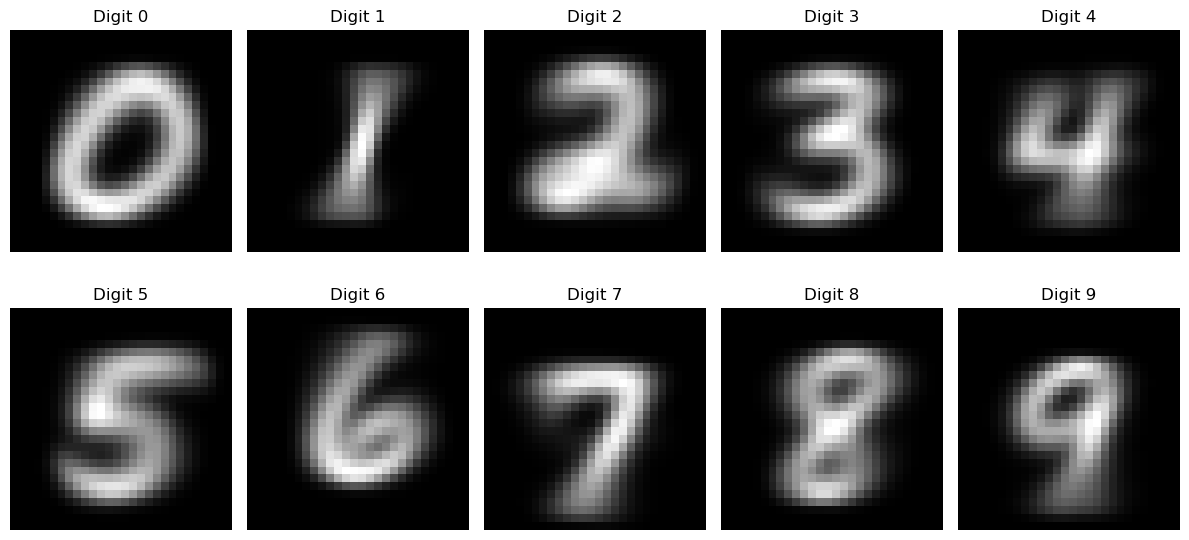

In [17]:
# Function to visualize the average image of each digit
def visualize_average_images(df):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    for digit in range(10):
        digit_df = df[df['label'] == digit]
        average_image_data = digit_df.iloc[:, :-1].mean().values.reshape(28, 28)
        ax = axes[digit // 5, digit % 5]
        ax.imshow(average_image_data, cmap='gray')
        ax.axis('off')
        ax.set_title(f'Digit {digit}')
    plt.tight_layout()
    plt.show()

# Visualize the average image of each digit
visualize_average_images(df)


## Step 6.7: Pixel Value Statistics
We will analyze the statistics of pixel values.


In [18]:
# Calculate and display statistics for pixel values
pixel_stats = df.drop(columns='label').describe()
pixel_stats.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


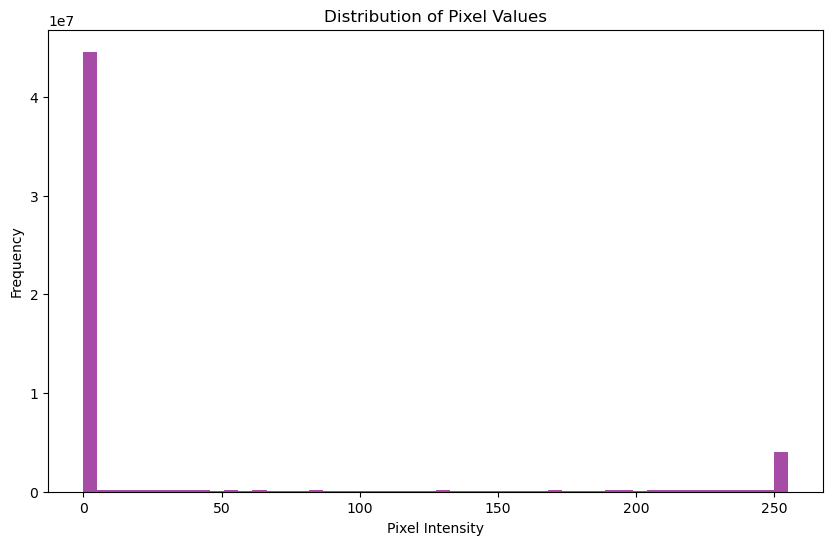

In [19]:
# Visualize the distribution of pixel values
pixel_values = df.drop(columns='label').values.flatten()
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Step 7: Applying Machine Learning Models on the MNIST Dataset

In this section, we will apply four machine learning models to the MNIST dataset. We will measure the training and evaluation time for each model and use `tqdm` to display progress.

## Step 7.1: Import Necessary Libraries
First, we need to import the necessary libraries.


In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns='label'))
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 7.2 Function to Optimize and Evaluate Models
To make the process easier, we define a function that handles model optimization and evaluation using GridSearchCV.

### Step-by-Step Explanation

1. **Hyperparameter Tuning using GridSearchCV**:

2. **Timing the Training Process**:

3. **Best Model Selection**:

4. **Prediction on Test Set**:

5. **Print the Accuracy and Classification Report**:.

6. **Visualize the Confusion Matrix**:

7. **Return the Best Model and Time Taken**:
    

In [21]:
def optimize_and_evaluate_model(model, param_grid, model_name):
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    # Best model
    best_model = grid_search.best_estimator_

    # Predict on test set
    y_pred = best_model.predict(X_test)

    # Print the accuracy and classification report
    print(f'{model_name} Best Parameters: {grid_search.best_params_}')
    print(f'{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print(f'Time taken: {end_time - start_time:.2f} seconds')

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Return the best model and time taken
    return best_model, end_time - start_time

## Step 7.3 Train and Evaluate Each Model

### Step 7.3.1 Logistic Regression
- Define the model and parameter grid.
- Call the optimization and evaluation function.

Fitting 3 folds for each of 3 candidates, totalling 9 fits


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Best Parameters: {'C': 0.1}
Logistic Regression Accuracy: 0.9199
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.90      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

Time taken: 50.29 seconds


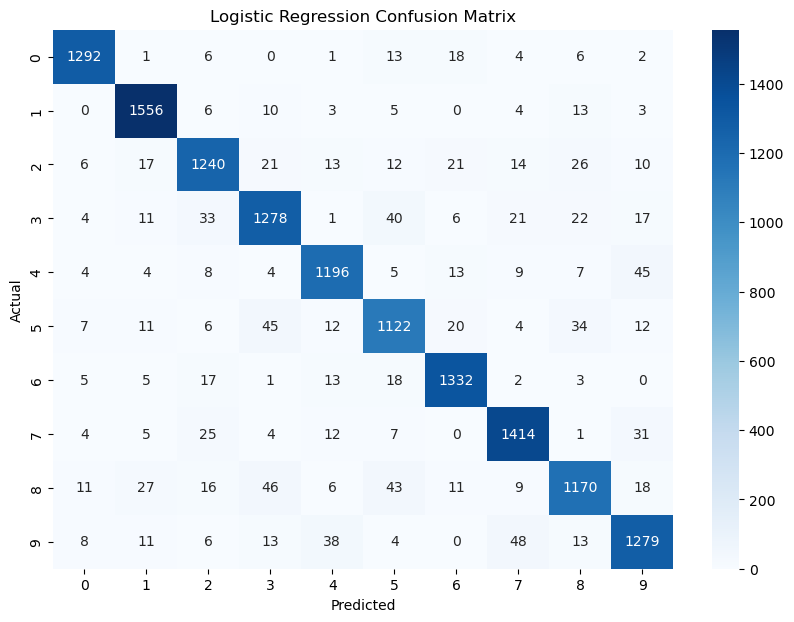

In [22]:
# Logistic Regression
logistic_regression = LogisticRegression(max_iter=100, solver='lbfgs', multi_class='multinomial')
param_grid_lr = {'C': [0.1, 1, 2]}
best_lr, time_lr = optimize_and_evaluate_model(logistic_regression, param_grid_lr, 'Logistic Regression')


### Step 7.3.2 Gaussian Naive Bayes
- Define the model.
- Call the optimization and evaluation function.

Note: Gaussian Naive Bayes has no hyperparameters to tune, so we pass an empty parameter grid.

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Gaussian Naive Bayes Best Parameters: {}
Gaussian Naive Bayes Accuracy: 0.5258
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.92      0.75      1343
           1       0.85      0.94      0.89      1600
           2       0.85      0.21      0.34      1380
           3       0.69      0.26      0.38      1433
           4       0.78      0.08      0.14      1295
           5       0.47      0.02      0.04      1273
           6       0.69      0.93      0.79      1396
           7       0.91      0.22      0.35      1503
           8       0.26      0.62      0.37      1357
           9       0.36      0.95      0.52      1420

    accuracy                           0.53     14000
   macro avg       0.65      0.52      0.46     14000
weighted avg       0.66      0.53      0.47     14000

Time taken: 6.96 seconds


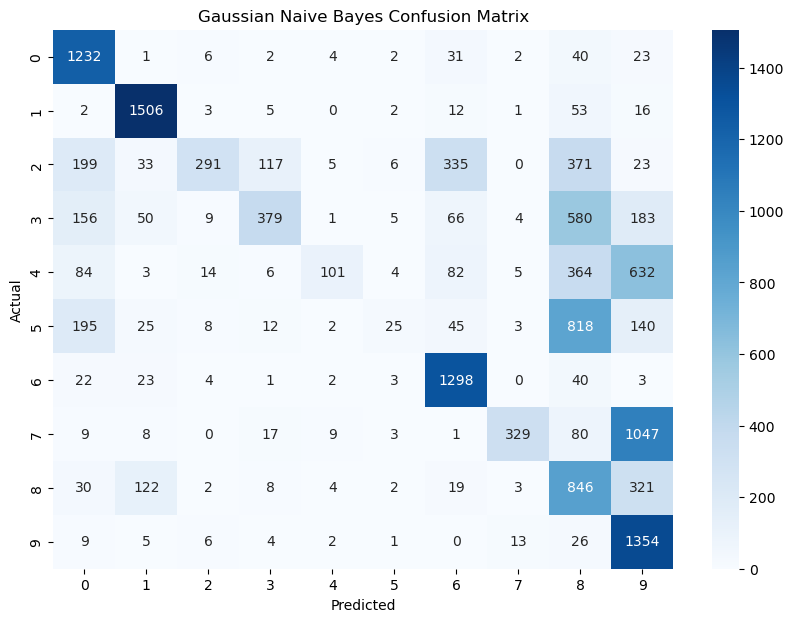

In [23]:
# Train and evaluate Gaussian Naive Bayes
gnb = GaussianNB()
best_gnb, time_gnb = optimize_and_evaluate_model(gnb, {}, 'Gaussian Naive Bayes')  # No hyperparameters to tune



### Step 7.3.3 Random Forest
Define the model and parameter grid.
Call the optimization and evaluation function.

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Random Forest Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Random Forest Accuracy: 0.9653
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.96      0.97      1503
           8       0.95      0.95      0.95      1357
           9       0.94      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Time taken: 182.43 seconds


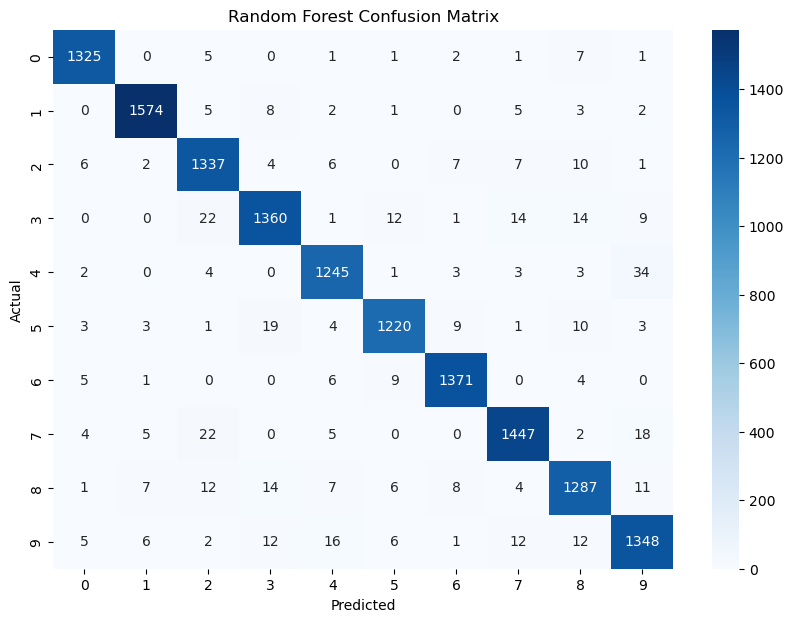

In [24]:
# Train and evaluate Random Forest
random_forest = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [10, 20]}
best_rf, time_rf = optimize_and_evaluate_model(random_forest, param_grid_rf, 'Random Forest')


### Step 7.3.4 K-Nearest Neighbors
Define the model and parameter grid.
Call the optimization and evaluation function.

Fitting 3 folds for each of 3 candidates, totalling 9 fits
K-Nearest Neighbors Best Parameters: {'n_neighbors': 3}
K-Nearest Neighbors Accuracy: 0.9466
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.94      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.95      0.94      0.94      1295
           5       0.95      0.94      0.95      1273
           6       0.97      0.97      0.97      1396
           7       0.94      0.93      0.93      1503
           8       0.97      0.90      0.93      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

Time taken: 109.98 seconds


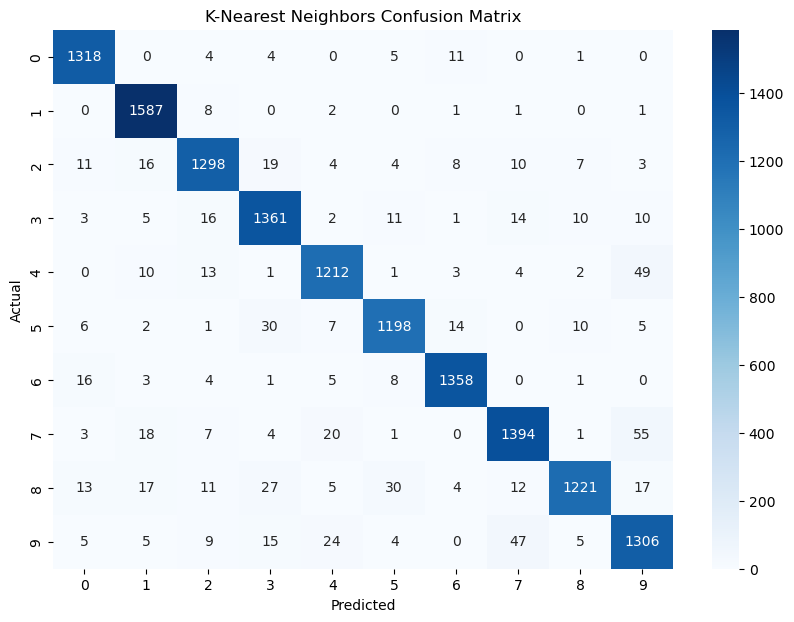

In [25]:
# Train and evaluate K-Nearest Neighbors
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7]}
best_knn, time_knn = optimize_and_evaluate_model(knn, param_grid_knn, 'K-Nearest Neighbors')



### Step 7.3.5 Decision Tree
Define the model and parameter grid.
Call the optimization and evaluation function

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Decision Tree Best Parameters: {'max_depth': 20, 'min_samples_split': 2}
Decision Tree Accuracy: 0.8721
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1343
           1       0.94      0.96      0.95      1600
           2       0.86      0.83      0.85      1380
           3       0.85      0.84      0.84      1433
           4       0.84      0.87      0.86      1295
           5       0.83      0.82      0.83      1273
           6       0.90      0.91      0.90      1396
           7       0.91      0.91      0.91      1503
           8       0.81      0.79      0.80      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000

Time taken: 86.25 seconds


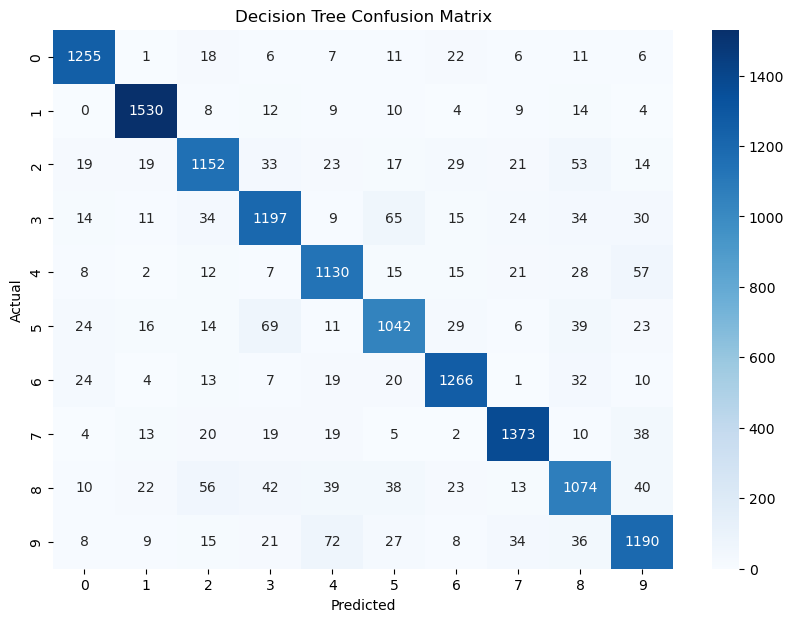

In [26]:
# Train and evaluate Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [10, 20], 'min_samples_split': [2, 10]}
best_dt, time_dt = optimize_and_evaluate_model(decision_tree, param_grid_dt, 'Decision Tree')



### Step 7.3.6 AdaBoost
Define the model and parameter grid.
Call the optimization and evaluation function.

Fitting 3 folds for each of 4 candidates, totalling 12 fits
AdaBoost Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
AdaBoost Accuracy: 0.7881
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1343
           1       0.90      0.93      0.91      1600
           2       0.73      0.77      0.75      1380
           3       0.73      0.76      0.75      1433
           4       0.77      0.74      0.76      1295
           5       0.66      0.68      0.67      1273
           6       0.91      0.74      0.82      1396
           7       0.89      0.79      0.84      1503
           8       0.70      0.79      0.74      1357
           9       0.68      0.81      0.74      1420

    accuracy                           0.79     14000
   macro avg       0.79      0.78      0.79     14000
weighted avg       0.80      0.79      0.79     14000

Time taken: 519.55 seconds


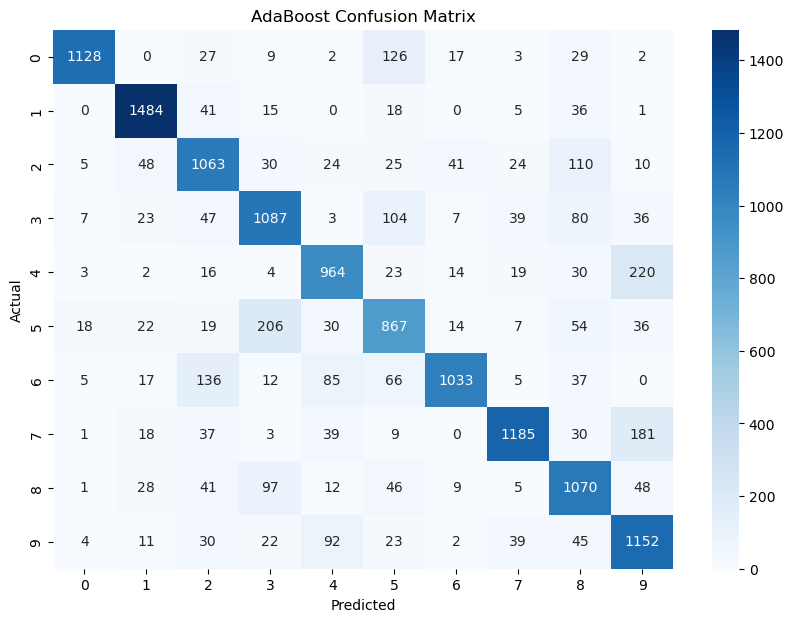

In [27]:
# Train and evaluate AdaBoost
adaboost = AdaBoostClassifier(random_state=42)
param_grid_ab = {'n_estimators': [50, 100], 'learning_rate': [0.1, 1]}
best_ab, time_ab = optimize_and_evaluate_model(adaboost, param_grid_ab, 'AdaBoost')


## Step 8: Model Comparison
We will compare the performance of the different models using bar plots.

In [28]:
# Model Comparison
results = {
    'Model': ['Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest', 'KNN', 'Decision Tree', 'AdaBoost'],
    'Accuracy': [
        accuracy_score(y_test, best_lr.predict(X_test)),
        accuracy_score(y_test, best_gnb.predict(X_test)),
        accuracy_score(y_test, best_rf.predict(X_test)),
        accuracy_score(y_test, best_knn.predict(X_test)),
        accuracy_score(y_test, best_dt.predict(X_test)),
        accuracy_score(y_test, best_ab.predict(X_test))
    ],
    'Time Taken (s)': [time_lr, time_gnb, time_rf, time_knn, time_dt, time_ab]
}

results_df = pd.DataFrame(results)


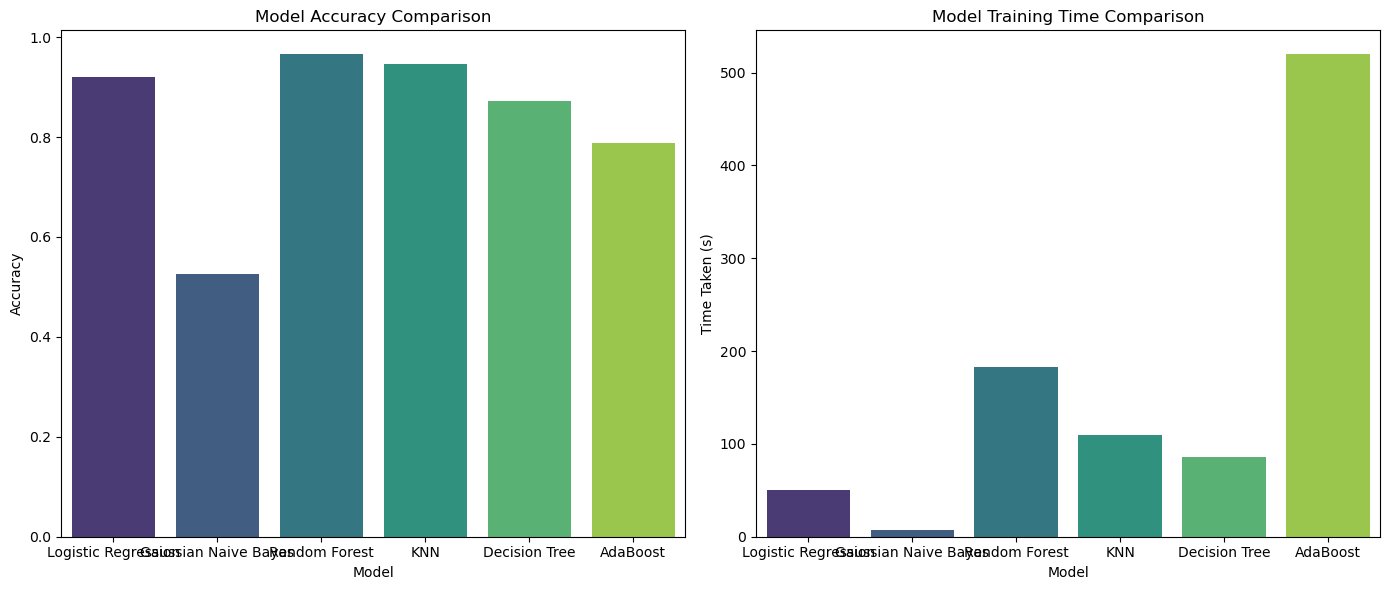

In [29]:
# Plot the comparison
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Time taken plot
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Time Taken (s)', data=results_df, palette='viridis')
plt.title('Model Training Time Comparison')
plt.xlabel('Model')
plt.ylabel('Time Taken (s)')

plt.tight_layout()
plt.show()

## Step 9: Create DataFrame with Actual and Predicted Labels
We will create a DataFrame that includes the actual labels and the predicted labels from each model.


In [30]:
# Create DataFrame with actual and predicted labels
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Logistic Regression': best_lr.predict(X_test),
    'Gaussian Naive Bayes': best_gnb.predict(X_test),
    'Random Forest': best_rf.predict(X_test),
    'KNN': best_knn.predict(X_test),
    'Decision Tree': best_dt.predict(X_test),
    'AdaBoost': best_ab.predict(X_test)
})

# Display the first few rows of the comparison DataFrame
comparison_df.head()

,Actual,Logistic Regression,Gaussian Naive Bayes,Random Forest,KNN,Decision Tree,AdaBoost
0,8,8,8,8,8,8,8
1,4,4,9,4,4,4,9
2,8,5,9,8,3,8,5
3,7,7,9,7,7,7,7
4,7,7,9,7,7,7,7


## Conclusion

In this notebook, we conducted comprehensive Exploratory Data Analysis (EDA) on the MNIST dataset and applied six different machine learning models to classify handwritten digits.

### EDA Highlights:
- **Basic Statistics and Information**: We reviewed the structure and summary statistics of the dataset.
- **Distribution of Digits**: Visualized the distribution of digit labels to understand class distribution.
- **Pixel Value Statistics**: Analyzed pixel value statistics and their distribution.
- **Sample Images**: Visualized sample images for each digit to understand variations in handwriting.
- **Mean and Standard Deviation Images**: Computed and visualized the mean and standard deviation images for each digit.

### Model Evaluation:
- We trained and evaluated six machine learning models: Logistic Regression, Gaussian Naive Bayes, Random Forest, KNN, Decision Tree, and AdaBoost.
- We measured the training and evaluation time for each model, generated confusion matrices, and compared model performance using bar plots.
- Created a DataFrame with actual and predicted labels from each model for further analysis.



These analyses provide a comprehensive understanding of the MNIST dataset and the performance of various machine learning models on it. The insights gained can be used to improve model accuracy and efficiency in future projects.
